# 순환신경망 5
> LSTM (1) - GPU실험, abcabC예제, abcdabcD예제

# import

In [1]:
import torch
import matplotlib.pyplot as plt
import time

/home/hankang07/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define some functions

In [2]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# GPU 실험

## 20000 len + 20 hidden nodes

***cpu***

In [3]:
x = torch.randn([20000,4]) 
y = torch.randn([20000,4]) 

In [7]:
rnn = torch.nn.RNN(4,20)
linr = torch.nn.Linear(20,4)
optimizr = torch.optim.Adam(list(rnn.parameters()) + list(linr.parameters()))
loss_fn = torch.nn.MSELoss()

In [9]:
t1 = time.time()
for epoc in range(100):
    ## 1
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x, _water)
    yhat = linr(hidden)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward() ## 사실 역전파 부분이 시간을 되게 많이 잡아먹음.
    ## 4
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1

145.73457264900208

***gpu***

In [11]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [12]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [13]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()  ## 시간차이의 이유!
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

4.398334980010986

- 왜 빠른지? (거의 30배정도 차이)

## 20000 len + 20 hidden nodes + 역전파주석처리

In [14]:
x = torch.randn([20000,4]) 
y = torch.randn([20000,4]) 

In [15]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [16]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

28.299692392349243

***gpu***

In [17]:
x = torch.randn([20000,4]).to("cuda:0")
y = torch.randn([20000,4]).to("cuda:0")

In [18]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [19]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    #loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

1.6998937129974365

- 미분을 진행하는 과정에서 gpu의 효율이 극대화된다.

## 2000 len + 20 hidden nodes

***cpu***

In [75]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [76]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [77]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

10.605574131011963

***gpu***

In [78]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [79]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [80]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

0.4819977283477783

## 2000 len + 20 hidden nodes + 역전파주석처리

In [82]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [83]:
rnn = torch.nn.RNN(4,20) 
linr = torch.nn.Linear(20,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [84]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    # loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

3.2522189617156982

***gpu***

In [85]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [86]:
rnn = torch.nn.RNN(4,20).to("cuda:0")
linr = torch.nn.Linear(20,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [87]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,20).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    # loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

0.1948552131652832

## 2000 len + 1000 hidden nodes

***cpu***

In [88]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [89]:
rnn = torch.nn.RNN(4,1000) 
linr = torch.nn.Linear(1000,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [90]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

43.083815574645996

***gpu***

In [91]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [92]:
rnn = torch.nn.RNN(4,1000).to("cuda:0")
linr = torch.nn.Linear(1000,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [93]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

5.486930847167969

## 2000 len + 1000 hidden nodes + 역전파주석처리

***cpu***

In [94]:
x = torch.randn([2000,4]) 
y = torch.randn([2000,4]) 

In [95]:
rnn = torch.nn.RNN(4,1000) 
linr = torch.nn.Linear(1000,4) 
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [96]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000)
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    # loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

6.92149543762207

***gpu***

In [97]:
x = torch.randn([2000,4]).to("cuda:0")
y = torch.randn([2000,4]).to("cuda:0")

In [98]:
rnn = torch.nn.RNN(4,1000).to("cuda:0")
linr = torch.nn.Linear(1000,4).to("cuda:0")
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()))
loss_fn = torch.nn.MSELoss() 

In [99]:
t1 = time.time()
for epoc in range(100):
    ## 1 
    _water = torch.zeros(1,1000).to("cuda:0")
    hidden, hT = rnn(x,_water) 
    yhat = linr(hidden) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3
    # loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
t2 = time.time()
t2 - t1 

2.9791648387908936

## 실험결과 요약

|len|# of hidden ndoes|backward|cpu|gpu|ratio|
|:--|:---------------:|:-------|:-:|:-:|:---:|
|20000|20|O|145.73|4.39|33.19|
|20000|20|X|28.29|1.69|16.73|
|2000|20|O|10.60|0.48|22.08|
|2000|20|X|3.25|0.19|17.10|
|2000|1000|O|43.08|5.48|7.86|
|2000|1000|X|6.92|2.97|2.32|

# Exam5: abcabC

## data

In [25]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 

In [26]:
txt = list('abcabC')*100
txt[:8]

['a', 'b', 'c', 'a', 'b', 'C', 'a', 'b']

In [27]:
txt_x = txt[:-1]
txt_y = txt[1:]
txt_x[:8], txt_y[:8]

(['a', 'b', 'c', 'a', 'b', 'C', 'a', 'b'],
 ['b', 'c', 'a', 'b', 'C', 'a', 'b', 'c'])

In [30]:
mapping = {'a':0,'b':1,'c':2,'C':3}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [32]:
x = x.to("cuda:0")
y = y.to("cuda:0")

`-` a,b,c,a,b,C
- 보이는 문자수가 a,b,c,C 이므로 4개

`-` a1,b1,c,a2,b2,C
- 문맥까지 고려하면 6개 

***hidden node의 개수를 2개로 하면 a,b,c,C 4개의 문자를 구분할 수는 있지만 문맥에 따른 차이점을 구분하기 모호할 수 있다.***

$\to$ 따라서 hidden node의 개수를 3으로 설정하자.

# RNN

In [33]:
torch.manual_seed(43052)
rnn = torch.nn.RNN(4,3)
linr = torch.nn.Linear(3,4)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters()) + list(linr.parameters()))

In [34]:
rnn.to("cuda:0")
linr.to("cuda:0")

Linear(in_features=3, out_features=4, bias=True)

`-` 3000 epochs

In [36]:
for epoc in range(3000):
    ## 1
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output, y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

In [38]:
yhat = soft(output)
combinded = torch.concat([hidden,yhat],axis=1).data.to('cpu')

Text(0.5, 1.0, 'Vis: $[h | \\hat{y}]$')

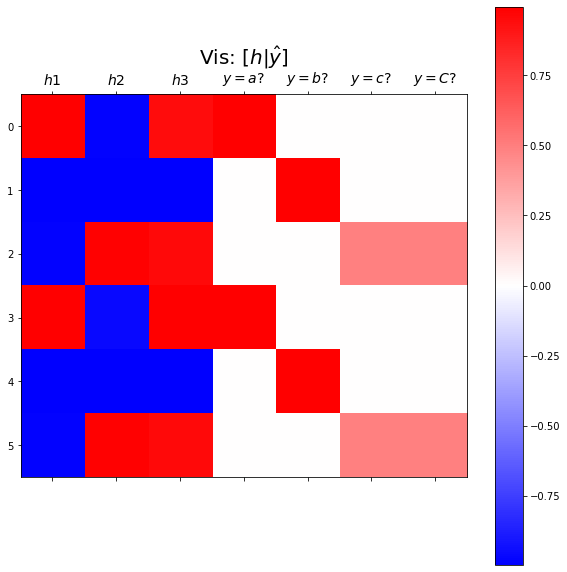

In [43]:
plt.matshow(combinded[-6:],cmap='bwr')
plt.xticks(range(7), labels=[r'$h1$',r'$h2$',r'$h3$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=C?$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(10)
plt.gcf().set_figheight(10)
plt.title(r"Vis: $[h | \hat{y}]$",size=20)

`-` 6000 epochs

In [45]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [46]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

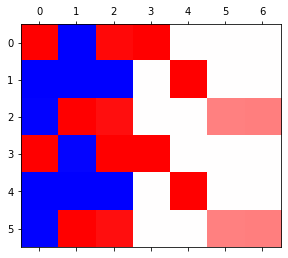

In [47]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 9000 epochs

In [48]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [49]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

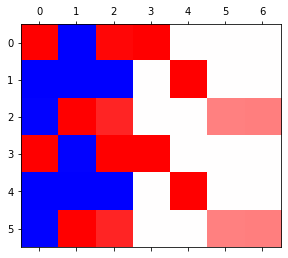

In [50]:
plt.matshow(combinded[-6:],cmap='bwr')

`-` 12000 epochs

In [51]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [52]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

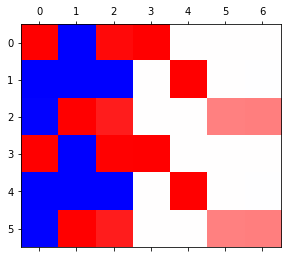

In [53]:
plt.matshow(combinded[-6:],cmap='bwr')

- 꽤 많이 맞추고 있긴 하지만 여전히 c, C를 1/2확률로 찍고있다...
- c가 나오기전 b, C가 나오기 전 b는 문맥의 뉘앙스가 다르기때문에 달라져야 한다. (but, 지금은 c와 C가 나오기전 b의 히든노드 색깔 모두 파란색이다.파/파/파) $\to$ c와 C 구분 못함.

`-` 15000 epochs

In [54]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [55]:
yhat = soft(output)
combinded  = torch.concat([hidden,yhat],axis=1).data.to("cpu")

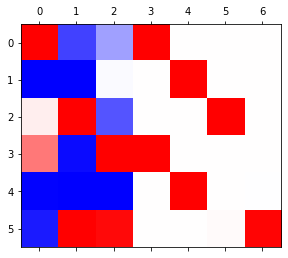

In [56]:
plt.matshow(combinded[-6:],cmap='bwr')

15000번 정도 진행하니까 abcabC가 잘 학습되었다.

- 학습이 잘 된 것을 보니까 피처가 달라진 것을 확인.
- 에폭을 좀 많이 돌려야 학습이 잘 되네.. 좋은 모형이 없을까??

# LSTM

`-` LSTM

In [57]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,3) 
linr = torch.nn.Linear(3,4) 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+ list(linr.parameters()))

In [58]:
lstm.to("cuda:0")
linr.to("cuda:0")

Linear(in_features=3, out_features=4, bias=True)

`-` 3000 epochs

LSTM은 물을 2개넣어줘야 하고 cT라는게 생긴다.

In [59]:
for epoc in range(3000):
    ## 1 
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [61]:
yhat = soft(output)
combinded = torch.concat([hidden,yhat],axis=1).data.to("cpu")

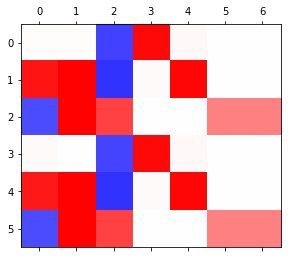

In [62]:
plt.matshow(combinded[-6:],cmap='bwr',vmin=-1,vmax=1)

RNN을 3000에폭 돌렸을 때는 hidden layer가 파랑(-1) 아니면 빨강(+1) 처럼 되게 뚜렸했는데, LSTM을 3000에폭 돌린 결과 하얀 부분이 많이 존재한다.(상대적으로 덜 뚜렷)

***(LSTM 3000에폭 돌린 느낌) : 학습을 아직 잘 못하는 것 같다. (c와 C를 찍고 있다) 분명 개선된 모델이라고 했는데???***

`-` 6000 epochs

In [63]:
for epoc in range(3000):
    ## 1
    _water = torch.zeros(1,3).to("cuda:0")
    hidden, (hT,cT) = lstm(x, (_water,_water))
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

In [64]:
yhat = soft(output)
combinded = torch.concat([hidden,yhat],axis=1).data.to("cpu")

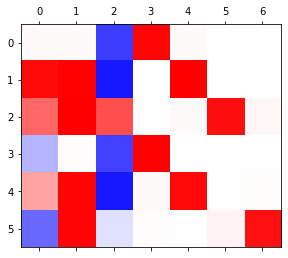

In [66]:
plt.matshow(combinded[-6:],cmap='bwr',vmin=-1,vmax=1)

***6000에폭만에 abcabC를 잘 학습이 되었다!***

***abcabC 예제에서 LSTM과 RNN을 비교해보니 LSTM이 확실히 우수한 것 같다.***

LSTM은 6000번만에 피처를 잘 찾았고, RNN은 15000번만에 피처를 잘 찾았으니까 LSTM이 좋다라고 하기에는 아직 실험횟수가 부족한 듯하다. 좀 더 성능비교를 위해 다양한 세팅에서 비교해보자.

# RNN vs. LSTM 성능비교실험

learning rate = 0.1로 크게 잡고, epoch은 3000번으로 통일.

`-` RNN

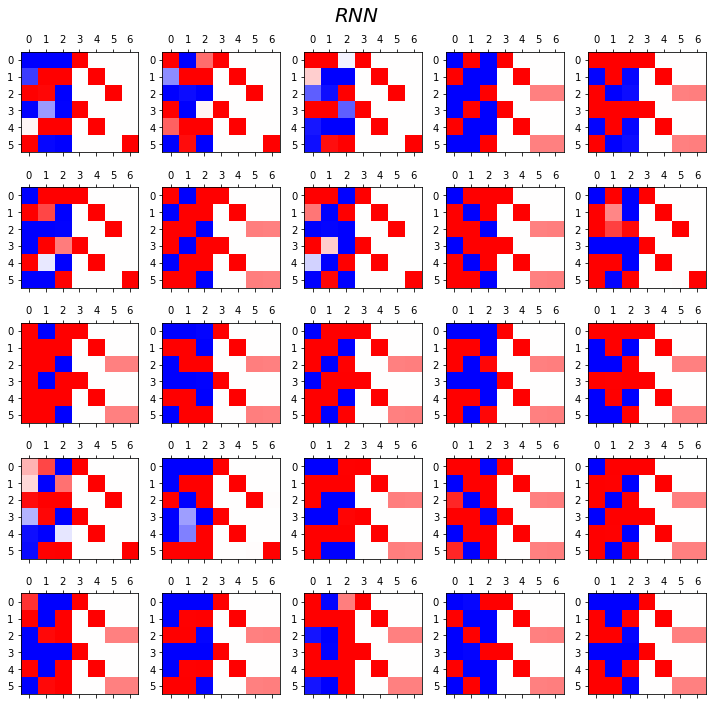

In [67]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,3).to("cuda:0")
        linr = torch.nn.Linear(3,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,3).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

`-` LSTM

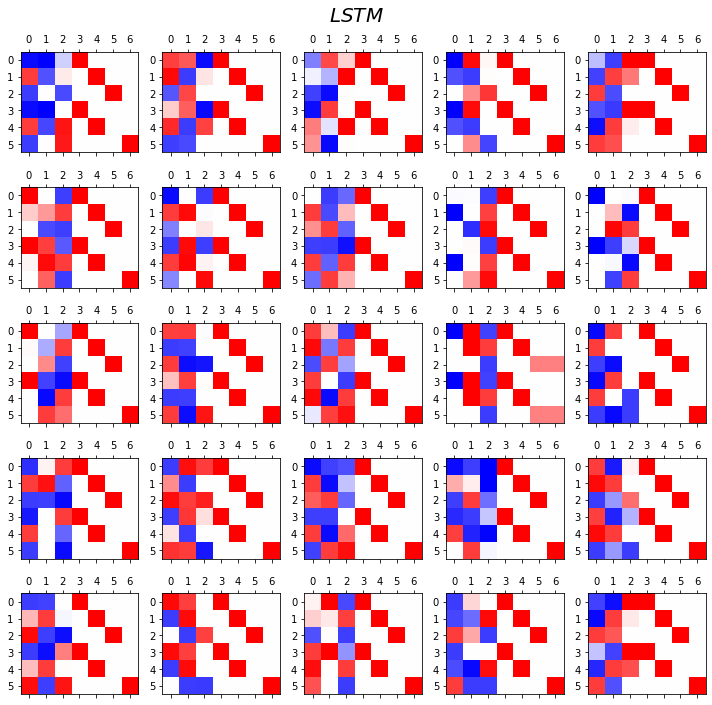

In [68]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,3).to("cuda:0")
        linr = torch.nn.Linear(3,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,3).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

딱봐도 해당 세팅에서 LSTM보다 RNN에서 잘 작동하는 것을 알 수 있다.

# Exam6: abcdabcD
> 좀 더 복잡한 예제

## data

In [69]:
txt = list('abcdabcD')*100
txt[:8]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'D']

In [70]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [71]:
mapping = {'a':0,'b':1,'c':2,'d':3,'D':4}
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [72]:
x=x.to("cuda:0")
y=y.to("cuda:0")

## RNN vs. LSTM 성능비교실헝

`-` RNN

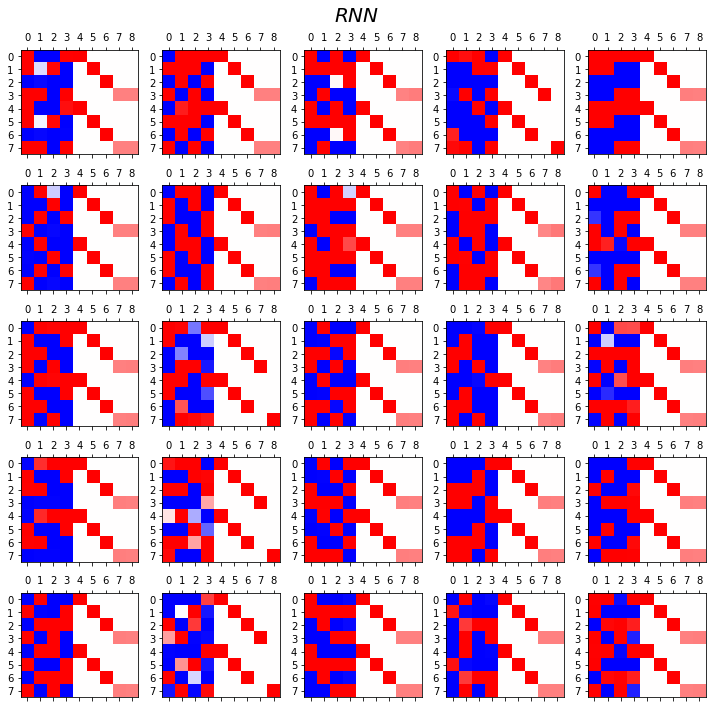

In [73]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(5,4).to("cuda:0")
        linr = torch.nn.Linear(4,5).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,4).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$RNN$",size=20)
fig.tight_layout()

성공횟수가 이전 예제보다 확실히 적어졌다.

`-` LSTM

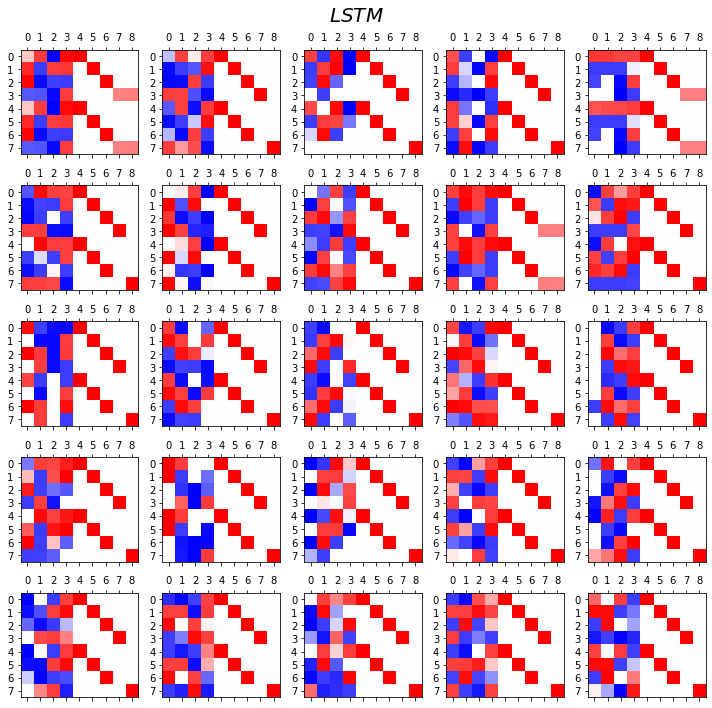

In [74]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(5,4).to("cuda:0")
        linr = torch.nn.Linear(4,5).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,4).to("cuda:0")
        for epoc in range(3000):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-8:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle(r"$LSTM$",size=20)
fig.tight_layout()

- 대부분 성공
- LSTM이 해당 세팅에서도 학습이 더 잘된다는 것을 알 수 있었다.

`-` 관찰1: LSTM이 확실히 장기기억에 강하다.

`-` 관찰2: LSTM은 hidden에 0이 잘 나온다.

- 사실 확실히 구분되는 특징을 판별할때는 -1,1로 히든레이어 값들이 설정되면 명확하다.
- 히든레이어에 -1~1 사이의 값이 나온다면 애매한 판단이 내려지게 된다.
- 그런데 이 애매한 판단이 어떻게 보면 문맥의 뉘앙스를 이해하는데 더 잘 맞다.
- 그런데 RNN은 -1,1로 셋팅된 상황에서 -1~1로의 변화가 더디다는 것이 문제임.